In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import random 
import pyreadr
import warnings
warnings.filterwarnings('ignore')

In [5]:
from pathlib import Path
p = Path().cwd()
print(f"original File path: {p}")
stringpath= str(p)[0:str(p).rfind('\\')] + '\\data'
print(f"Updated File Path to pick from Data Library: { stringpath}")
#ngsimfile=stringpath + '/' + 'Sample_Cleaned_NGSIM_Data_Part_2.csv'
ngsimfile=stringpath + '/' + 'I80_1st15minutes_complete.rds'
#ngsim = pd.read_csv(ngsimfile,low_memory=False, index_col=0)
df = pyreadr.read_r(ngsimfile)

original File path: c:\Users\rakes\car following model\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Updated File Path to pick from Data Library: c:\Users\rakes\car following model\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [6]:
ngsim=df[None]

In [97]:
ngsim

,Vehicle.ID,Frame.ID,Lane,Local.Y,svel,sacc,Vehicle.Length,Vehicle.class,Following.Vehicle.ID,Preceding.Vehicle.ID,...,frspacing,entryLane,entry,LCType,dV,svelkm,PrecVehVelkm,svelkm.level,PrecVehVelkm.level,dA
0,1,147,2,50.08315,2.84104,1.46320,4.3591,2,-1,-1,...,NaN,2,MainLine,CFonly,NaN,10.227744,NaN,"(10,15]",NaN,NaN
1,1,148,2,50.38612,3.02972,1.88680,4.3591,2,-1,-1,...,NaN,2,MainLine,CFonly,NaN,10.906992,NaN,"(10,15]",NaN,NaN
2,1,149,2,50.69421,3.08086,0.51134,4.3591,2,-1,-1,...,NaN,2,MainLine,CFonly,NaN,11.091096,NaN,"(10,15]",NaN,NaN
3,1,150,2,51.00658,3.12377,0.42912,4.3591,2,-1,-1,...,NaN,2,MainLine,CFonly,NaN,11.245572,NaN,"(10,15]",NaN,NaN
4,1,151,2,51.32203,3.15445,0.30681,4.3591,2,-1,-1,...,NaN,2,MainLine,CFonly,NaN,11.356020,NaN,"(10,15]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059016,3366,3198,1,440.79796,18.61708,0.18434,5.1212,2,978,-1,...,NaN,1,MainLine,CFonly,NaN,67.021488,NaN,"(65,70]",NaN,NaN
1059017,3366,3199,1,442.66070,18.62743,0.10346,5.1212,2,978,-1,...,NaN,1,MainLine,CFonly,NaN,67.058748,NaN,"(65,70]",NaN,NaN
1059018,3366,3200,1,444.52374,18.63045,0.03020,5.1212,2,978,-1,...,NaN,1,MainLine,CFonly,NaN,67.069620,NaN,"(65,70]",NaN,NaN
1059019,3366,3201,1,446.38651,18.62770,-0.02746,5.1212,2,978,-1,...,NaN,1,MainLine,CFonly,NaN,67.059720,NaN,"(65,70]",NaN,NaN


In [98]:
ngsim.describe().T

,count,mean,std,min,25%,50%,75%,max
Vehicle.ID,1059021.0,1741.392665,961.611791,1.000000,982.000000,1763.000000,2448.000000,3366.000000
Frame.ID,1059021.0,5281.295950,2635.698457,61.000000,2998.000000,5487.000000,7578.000000,9956.000000
Lane,1059021.0,4.143000,17.295464,1.000000,2.000000,4.000000,5.000000,999.000000
Local.Y,1059021.0,248.655292,112.982158,50.000230,152.804410,244.397390,345.927860,456.062210
svel,1059021.0,7.659711,3.998065,0.000000,5.244110,7.405160,9.221460,31.625200
sacc,1059021.0,-0.021538,0.969077,-14.187700,-0.409030,0.000000,0.395470,7.703080
Vehicle.Length,1059021.0,4.958966,2.491982,1.646100,4.206700,4.511500,4.816400,23.228300
Vehicle.class,1059021.0,2.044427,0.220305,1.000000,2.000000,2.000000,2.000000,3.000000
Following.Vehicle.ID,1059021.0,1639.665306,1020.386156,-1.000000,763.000000,1697.000000,2405.000000,3366.000000
Preceding.Vehicle.ID,1059021.0,1631.255403,1018.896331,-1.000000,753.000000,1690.000000,2399.000000,3366.000000


In [99]:
ngsim.columns

Index(['Vehicle.ID', 'Frame.ID', 'Lane', 'Local.Y', 'svel', 'sacc',
       'Vehicle.Length', 'Vehicle.class', 'Following.Vehicle.ID',
       'Preceding.Vehicle.ID', 'Vehicle.Width.ft', 'PrecVehClass',
       'FollVehClass', 'PrecVehLength', 'FollVehLength', 'lane.change',
       'PrecVehVel', 'PrecVehAcc', 'FollVehVel', 'FollVehAcc', 'Vehicle.type',
       'PrecVehType', 'lanechng', 'PrecVehLocalY', 'FollVehLocalY', 'spacing',
       'headway', 'frspacing', 'entryLane', 'entry', 'LCType', 'dV', 'svelkm',
       'PrecVehVelkm', 'svelkm.level', 'PrecVehVelkm.level', 'dA'],
      dtype='object')

In [100]:
ngsim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059021 entries, 0 to 1059020
Data columns (total 37 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   Vehicle.ID            1059021 non-null  int32   
 1   Frame.ID              1059021 non-null  int32   
 2   Lane                  1059021 non-null  int32   
 3   Local.Y               1059021 non-null  float64 
 4   svel                  1059021 non-null  float64 
 5   sacc                  1059021 non-null  float64 
 6   Vehicle.Length        1059021 non-null  float64 
 7   Vehicle.class         1059021 non-null  int32   
 8   Following.Vehicle.ID  1059021 non-null  int32   
 9   Preceding.Vehicle.ID  1059021 non-null  int32   
 10  Vehicle.Width.ft      1059021 non-null  float64 
 11  PrecVehClass          992286 non-null   object  
 12  FollVehClass          992007 non-null   object  
 13  PrecVehLength         992286 non-null   float64 
 14  FollVehLength     

In [7]:
ngsim = ngsim[ngsim["Preceding.Vehicle.ID"] != -1]

In [8]:
ngsim["Vehicle.ID"]=ngsim["Vehicle.ID"].astype(str)
ngsim["Preceding.Vehicle.ID"]=ngsim["Preceding.Vehicle.ID"].astype(str)
ngsim["LF_pairs"] = ngsim["Preceding.Vehicle.ID"]+ "_"+ngsim["Vehicle.ID"]

In [9]:
ngsim["Vehicle.class"]=ngsim["Vehicle.class"].astype(str)
ngsim["PrecVehClass"]=ngsim["PrecVehClass"].astype(str)
ngsim["Veh.cls.pairs"] = ngsim["PrecVehClass"]+ "_"+ngsim["Vehicle.class"]


In [11]:
#ngsim["Time.per.frame"] = 0.1

In [12]:
#ngsim_grp = ngsim.groupby(["LF_pairs"])

In [10]:
ngsim['Pair_Time_Duration']=(ngsim.groupby(['LF_pairs'],as_index=False).cumcount()*0.1) +0.1

In [11]:
ngsim["nextframeAcc"]=ngsim.groupby(["LF_pairs"],as_index=False)["sacc"].shift(-5)
ngsim["nextframesvel"]=ngsim.groupby(["LF_pairs"],as_index=False)["svel"].shift(-5)
ngsim["nextframeposition"]=ngsim.groupby(["LF_pairs"],as_index=False)["Local.Y"].shift(-5)

## one hot encoding on pairs

In [469]:
from sklearn.preprocessing import OneHotEncoder

In [470]:
ngsim['Veh.cls.pairs'] = ngsim['Veh.cls.pairs'].astype('category')
ngsim['Veh.cls.pairs.new'] = ngsim['Veh.cls.pairs'].cat.codes
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(ngsim[['Veh.cls.pairs.new']]).toarray())
enc.get_feature_names()
enc_data.columns = enc.get_feature_names()
new_ngsim=ngsim.join(enc_data)

new_ngsim

,Vehicle.ID,Frame.ID,Lane,Local.Y,svel,sacc,Vehicle.Length,Vehicle.class,Following.Vehicle.ID,Preceding.Vehicle.ID,...,nextframesvel,nextframeposition,Veh.cls.pairs.new,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6
334,1,481,2,173.27443,6.94512,-0.96402,4.3591,2,11,3355,...,6.82504,173.95693,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
335,1,482,2,173.95693,6.82504,-1.20074,4.3591,2,11,3355,...,6.68521,174.62545,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
336,1,483,2,174.62545,6.68521,-1.39833,4.3591,2,11,3355,...,6.53877,175.27933,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
337,1,484,2,175.27933,6.53877,-1.46441,4.3591,2,11,3355,...,6.40379,175.91971,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
338,1,485,2,175.91971,6.40379,-1.34976,4.3591,2,11,3355,...,6.29493,176.54920,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058995,3366,3177,1,401.98395,19.22258,-1.47646,5.1212,2,978,977,...,19.04817,403.88877,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058996,3366,3178,1,403.88877,19.04817,-1.74406,5.1212,2,978,977,...,18.85603,405.77437,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058997,3366,3179,1,405.77437,18.85603,-1.92143,5.1212,2,978,977,...,18.66341,407.64071,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058998,3366,3180,1,407.64071,18.66341,-1.92618,5.1212,2,978,977,...,18.50354,409.49107,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
#enc=OneHotEncoder()

In [411]:
#enc_data=pd.DataFrame(enc.fit_transform(ngsim[['Veh.cls.pairs.new']]).toarray())

In [412]:
#new_ngsim=ngsim.join(enc_data)

In [415]:
#ngsim['Veh.cls.pairs'].unique()

['2_2', '1_2', '3_2', '2_3', '3_3', '1_1', '1_nan']
Categories (7, object): ['1_1', '1_2', '1_nan', '2_2', '2_3', '3_2', '3_3']

## Random Forest model for reconstructed i-80 data 

In [20]:
#ngsim.dropna(inplace = True)

In [106]:
ngsim.shape

(992292, 43)

In [107]:
ngsim['LF_pairs'].unique()

array(['3355_1', '44_2', '21_4', ..., '2289_3365', '2296_3365',
       '977_3366'], dtype=object)

In [110]:
ngsim['PrecVehType'].unique()

array(['Car', 'Heavy-Vehicle', 'Motorcycle', nan], dtype=object)

In [111]:
ngsim['PrecVehType'].dtypes

dtype('O')

In [12]:
ngsim['PrecVehType'] = ngsim['PrecVehType'].map({'Motorcycle': 1, 'Car': 2, 'Heavy-Vehicle': 3})
ngsim['Vehicle.type'] = ngsim['Vehicle.type'].map({'Motorcycle': 1, 'Car': 2, 'Heavy-Vehicle': 3})

In [13]:
ngsim = ngsim[ngsim["dV"].notna()]
ngsim = ngsim[ngsim["spacing"].notna()]
ngsim = ngsim[ngsim["nextframesvel"].notna()]
ngsim = ngsim[ngsim["svel"].notna()]
ngsim = ngsim[ngsim["PrecVehVel"].notna()]

In [17]:
def training_pairs(data):
    random.seed(2109)
    pairs = data["LF_pairs"].unique()
    pairs = pairs.tolist()
    v = round(len(pairs)*0.7)   
    pairs = random.sample(pairs, v)
    return pairs
my_pairs=training_pairs(ngsim)
#converting the total dataset to 70/30% pair for train and test. 
train = ngsim[ngsim['LF_pairs'].isin(my_pairs)]

test = ngsim[~ngsim['LF_pairs'].isin(my_pairs)]

In [106]:
X_train = train[['spacing','PrecVehType','Vehicle.type','dV', 'sacc']]
y_train= train['nextframesvel']
X_test = test[['spacing','PrecVehType','Vehicle.type','dV', 'sacc']]
y_test= test['nextframesvel']
rf = RandomForestRegressor(n_estimators = 5, n_jobs = -1)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5, n_jobs=-1)

In [22]:
ngsim['LF_pairs'].unique().shape

(3841,)

In [75]:
ngsim.columns

Index(['Vehicle.ID', 'Frame.ID', 'Lane', 'Local.Y', 'svel', 'sacc',
       'Vehicle.Length', 'Vehicle.class', 'Following.Vehicle.ID',
       'Preceding.Vehicle.ID', 'Vehicle.Width.ft', 'PrecVehClass',
       'FollVehClass', 'PrecVehLength', 'FollVehLength', 'lane.change',
       'PrecVehVel', 'PrecVehAcc', 'FollVehVel', 'FollVehAcc', 'Vehicle.type',
       'PrecVehType', 'lanechng', 'PrecVehLocalY', 'FollVehLocalY', 'spacing',
       'headway', 'frspacing', 'entryLane', 'entry', 'LCType', 'dV', 'svelkm',
       'PrecVehVelkm', 'svelkm.level', 'PrecVehVelkm.level', 'dA', 'LF_pairs',
       'Veh.cls.pairs', 'Pair_Time_Duration', 'nextframeAcc', 'nextframesvel',
       'nextframeposition'],
      dtype='object')

In [107]:
def data_in_parts(test,rangefrom,rangeto):
    a=test['LF_pairs'].unique()
    b = a.tolist()
    b = b[rangefrom:rangeto]
    c= len(a)/30
    return c,b 


def prediction(test,b,target_variable,RFReg):
    F_df = []
    r = []
    Q = pd.DataFrame()
# b is the test range
    for i in b:
# Q this is the input data frame
        Q = test[test['LF_pairs']== i]
        #vel=np.zeros(Q.shape[0])
        PrecVehType =  np.zeros(Q.shape[0])
        FollVehtype = np.zeros(Q.shape[0])
        spacing = np.zeros(Q.shape[0])
        dv = np.zeros(Q.shape[0])
        #pred_acc = np.zeros(Q.shape[0])
        pred_vel = np.zeros(Q.shape[0])
        acc = np.zeros(Q.shape[0])
    
        
    
        #adding first value of the vehicle
        #vel[0]=Q.iloc[0]['svel']
        acc[0]= Q.iloc[0]['sacc']
        PrecVehType[0]=Q.iloc[0]['PrecVehType']
        FollVehtype[0] = Q.iloc[0]['Vehicle.type']
        spacing[0] = Q.iloc[0]['spacing']
        
        dv[0] = Q.iloc[0]['dV']   
        #pred_speed[0] = Q.iloc[0]['svel']
    #?? verify this     
        #pred_acc[0] = Q.iloc[1][target_variable]
        pred_vel[0] = Q.iloc[1][target_variable]

     
    

#     #predicting first value of acceleration
            #check here
        #pred_acc[1]= rf.predict(np.array([vel[0],PrecVehType[0],FollVehtype[0],dv[0],spacing[0]]).reshape(1,-1))
        pred_vel[1]= rf.predict(np.array([spacing[0],PrecVehType[0],FollVehtype[0],dv[0],acc[0]]).reshape(1,-1))
            

#     #calculating vel,frspacing,local.y,dv from the predicted acceleration.
            #check here
    
    
        for j in range(2,len(Q)):
#         ########
#         #print(j)
#         ########
            #vel[j] = vel[j-1]+(pred_acc[j]*0.1)
            acc[j] = (pred_vel[j]-pred_vel[j-1])/0.5
            #dv[j] = vel[j] - Q.iloc[j]['PrecVehVel']
            dv[j] = pred_vel[j] - Q.iloc[j]['PrecVehVel']
            #spacing[j] = spacing[j-1]+((vel[j-1]*0.1)+ (0.5*pred_acc[j]*pow(0.1,2)))
            spacing[j] = spacing[j-1]+((pred_vel[j-1]*0.5)+ (0.5*acc[j]*pow(0.5,2)))
            PrecVehType[j]= PrecVehType[j-1]
            FollVehtype[j]=FollVehtype[j-1]
#         ########
#         ## localy: s = ut + 0.5*a*t^2
#         ########
            
            if j == len(Q)-1:
                break
            #pred_vel[j+1] = rf.predict(np.array([PrecVehType[j],FollVehtype[j],vel[j],dv[j],spacing[j]]).reshape(1, -1))
            pred_vel[j+1] = rf.predict(np.array([spacing[j],PrecVehType[j],FollVehtype[j], dv[j],acc[j]]).reshape(1, -1))
#         ########
#         #print(pred_acc)
#         ########
        #Q['pacc']=pred_acc
        #Q['pvel']=vel
        Q['pvel']=pred_vel
        Q['pacc']=acc
        Q['PrecVehType']= PrecVehType
        Q['FollVehtype']= FollVehtype
        Q['pdv']= dv
        Q['spacing']=spacing

        F_df.append(Q)
        result = pd.concat(F_df)
        #r.append(r2_score(Q[target_variable], Q['pacc']))
        
 
    return result


In [109]:
c, b = data_in_parts(test,0,20)
print(b)


#Predicted acceleration
target_variable = 'nextframesvel'
F = prediction(test, b, target_variable, rf)

['3355_1', '25_12', '17_12', '15_13', '27_31', '25_39', '13_41', '67_50', '61_50', '81_50', '3355_53', '55_59', '43_61', '50_66', '41_66', '61_67', '64_70', '70_80', '72_81', '51_86']


In [94]:
F

,Vehicle.ID,Frame.ID,Lane,Local.Y,svel,sacc,Vehicle.Length,Vehicle.class,Following.Vehicle.ID,Preceding.Vehicle.ID,...,LF_pairs,Veh.cls.pairs,Pair_Time_Duration,nextframeAcc,nextframesvel,nextframeposition,pvel,pacc,FollVehtype,pdv
334,1,481,2,173.27443,6.94512,-0.96402,4.3591,2,11,3355,...,3355_1,2_2,0.1,-1.08862,6.29493,176.54920,6.217680,-0.964020,2.0,-2.068960
335,1,482,2,173.95693,6.82504,-1.20074,4.3591,2,11,3355,...,3355_1,2_2,0.2,-0.77250,6.21768,177.17097,2.546230,0.000000,0.0,0.000000
336,1,483,2,174.62545,6.68521,-1.39833,4.3591,2,11,3355,...,3355_1,2_2,0.3,-0.49091,6.16859,177.78783,0.000000,-5.092460,0.0,-8.809350
337,1,484,2,175.27933,6.53877,-1.46441,4.3591,2,11,3355,...,3355_1,2_2,0.4,-0.28980,6.13961,178.40179,12.686914,25.373828,0.0,3.932214
338,1,485,2,175.91971,6.40379,-1.34976,4.3591,2,11,3355,...,3355_1,2_2,0.5,-0.16803,6.12281,179.01407,19.919686,14.465544,0.0,11.200486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97153,326,1633,6,405.45028,10.67435,-0.03777,4.2067,2,336,316,...,316_326,2_2,1.7,0.01458,10.67376,410.78644,23.124202,1.723216,0.0,14.858722
97154,326,1634,6,406.51752,10.67240,-0.01954,4.2067,2,336,316,...,316_326,2_2,1.8,0.02235,10.67599,411.85404,23.516910,0.785416,0.0,15.093910
97155,326,1635,6,407.58468,10.67158,-0.00813,4.2067,2,336,316,...,316_326,2_2,1.9,0.02499,10.67849,412.92189,23.516910,0.000000,0.0,14.947930
97156,326,1636,6,408.65184,10.67158,0.00001,4.2067,2,336,316,...,316_326,2_2,2.0,0.00126,10.67861,413.98975,26.271380,5.508940,0.0,17.571130


In [85]:
F["LF_pairs"].unique()

array(['3355_1', '25_12', '17_12', '15_13', '27_31', '25_39', '13_41',
       '67_50', '61_50', '81_50'], dtype=object)

In [110]:
F1 = F[F["LF_pairs"] == "27_31"]

In [111]:
F1

,Vehicle.ID,Frame.ID,Lane,Local.Y,svel,sacc,Vehicle.Length,Vehicle.class,Following.Vehicle.ID,Preceding.Vehicle.ID,...,LF_pairs,Veh.cls.pairs,Pair_Time_Duration,nextframeAcc,nextframesvel,nextframeposition,pvel,pacc,FollVehtype,pdv
7773,31,255,5,50.31543,6.75510,-0.09145,5.7309,2,-1,27,...,27_31,2_2,0.1,-0.07779,6.67804,53.66595,6.673000,-0.091450,2.0,0.083160
7774,31,256,5,50.98852,6.73092,-0.24178,5.7309,2,-1,27,...,27_31,2_2,0.2,-0.05037,6.67300,54.33325,6.230948,0.000000,0.0,0.000000
7775,31,257,5,51.65982,6.71299,-0.17933,5.7309,2,-1,27,...,27_31,2_2,0.3,-0.03520,6.66948,55.00020,0.000000,-12.461896,0.0,-6.666450
7776,31,258,5,52.32957,6.69746,-0.15532,5.7309,2,-1,27,...,27_31,2_2,0.4,-0.02692,6.66679,55.66688,14.549294,29.098588,0.0,7.884744
7777,31,259,5,52.99815,6.68582,-0.11639,5.7309,2,-1,27,...,27_31,2_2,0.5,-0.02052,6.66474,56.33335,18.821980,8.545372,0.0,12.158790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,31,547,5,163.77293,7.50197,-0.18216,5.7309,2,43,27,...,27_31,2_2,29.3,-0.01951,7.47612,167.51382,27.834750,0.364948,0.0,20.261530
8066,31,548,5,164.52193,7.48998,-0.11983,5.7309,2,43,27,...,27_31,2_2,29.4,-0.00098,7.47603,168.26143,27.652276,-0.364948,0.0,20.105326
8067,31,549,5,165.27033,7.48401,-0.05975,5.7309,2,43,27,...,27_31,2_2,29.5,0.02633,7.47866,169.00929,27.834750,0.364948,0.0,20.328200
8068,31,550,5,166.01840,7.48077,-0.03235,5.7309,2,43,27,...,27_31,2_2,29.6,0.06230,7.48489,169.75778,27.652276,-0.364948,0.0,20.193576


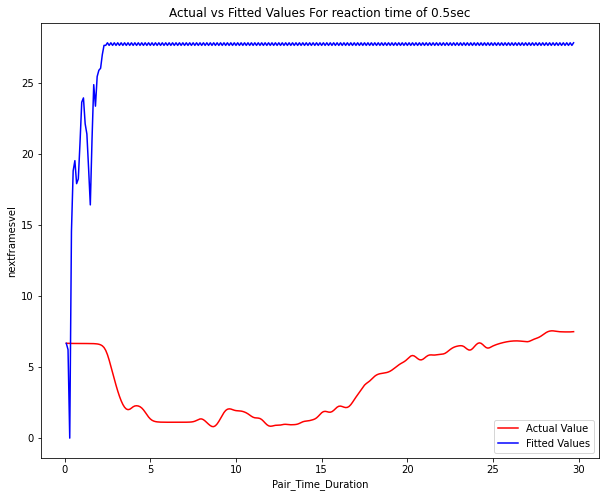

In [112]:
import seaborn as sns
plt.figure(figsize=(10, 8))


ax = sns.lineplot(x=F1["Pair_Time_Duration"], y = F1["nextframesvel"], color="r", label="Actual Value")
sns.lineplot(x=F1["Pair_Time_Duration"], y =F1["pvel"],  color="b", label="Fitted Values" )


plt.title('Actual vs Fitted Values For reaction time of 0.5sec')


plt.show()
plt.close()

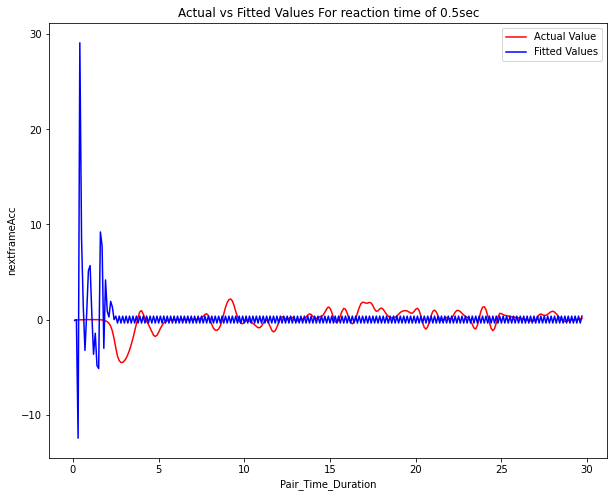

In [114]:
import seaborn as sns
plt.figure(figsize=(10, 8))


ax = sns.lineplot(x=F1["Pair_Time_Duration"], y = F1["nextframeAcc"], color="r", label="Actual Value")
sns.lineplot(x=F1["Pair_Time_Duration"], y =F1["pacc"],  color="b", label="Fitted Values" )


plt.title('Actual vs Fitted Values For reaction time of 0.5sec')


plt.show()
plt.close()

ngsim['dV'] = ngsim['dV'].astype('float32')
ngsim['spacing'] = ngsim['spacing'].astype('float32')
ngsim['PrecVehType'] = ngsim['PrecVehType'].astype('float32')
ngsim['nextframesvel'] = ngsim['nextframesvel'].astype('float32')


In [31]:
X_train = ngsim[['svel','PrecVehVel','dV', 'Vehicle.type', 'PrecVehType', 'spacing']][(ngsim['LF_pairs'] != '17_12') & (ngsim['LF_pairs'] != '3355_1') ]
y_train = ngsim['nextframesvel'][(ngsim['LF_pairs'] != '17_12') & (ngsim['LF_pairs'] != '3355_1') ]

X_test = ngsim[['svel','PrecVehVel','dV', 'Vehicle.type', 'PrecVehType', 'spacing']][(ngsim['LF_pairs'] == '17_12') ]
y_test1 = ngsim['nextframesvel'][(ngsim['LF_pairs'] == '17_12') ]

X_test2 = ngsim[['svel','PrecVehVel','dV', 'Vehicle.type', 'PrecVehType', 'spacing']][(ngsim['LF_pairs'] == '3355_1') ]
y_test2 = ngsim['nextframesvel'][(ngsim['LF_pairs'] == '3355_1') ]

In [32]:
ngsim

,Vehicle.ID,Frame.ID,Lane,Local.Y,svel,sacc,Vehicle.Length,Vehicle.class,Following.Vehicle.ID,Preceding.Vehicle.ID,...,svelkm.level,PrecVehVelkm.level,dA,LF_pairs,Veh.cls.pairs,Time.per.frame,Time_duration,nextframeAcc,nextframesvel,nextframeposition
334,1,481,2,173.27443,6.94512,-0.96402,4.3591,2,11,3355,...,"(25,30]","(30,35]",0.65758,3355_1,2_2,0.1,0.0,-1.20074,6.82504,173.95693
335,1,482,2,173.95693,6.82504,-1.20074,4.3591,2,11,3355,...,"(20,25]","(30,35]",0.01280,3355_1,2_2,0.1,0.1,-1.39833,6.68521,174.62545
336,1,483,2,174.62545,6.68521,-1.39833,4.3591,2,11,3355,...,"(20,25]","(30,35]",-0.56450,3355_1,2_2,0.1,0.2,-1.46441,6.53877,175.27933
337,1,484,2,175.27933,6.53877,-1.46441,4.3591,2,11,3355,...,"(20,25]","(30,35]",-0.91793,3355_1,2_2,0.1,0.3,-1.34976,6.40379,175.91971
338,1,485,2,175.91971,6.40379,-1.34976,4.3591,2,11,3355,...,"(20,25]","(30,35]",-0.99473,3355_1,2_2,0.1,0.4,-1.08862,6.29493,176.54920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058994,3366,3176,1,400.06169,19.37023,-1.16084,5.1212,2,978,977,...,"(65,70]","(65,70]",-1.27048,977_3366,2_2,0.1,21.7,-1.47646,19.22258,401.98395
1058995,3366,3177,1,401.98395,19.22258,-1.47646,5.1212,2,978,977,...,"(65,70]","(65,70]",-2.33206,977_3366,2_2,0.1,21.8,-1.74406,19.04817,403.88877
1058996,3366,3178,1,403.88877,19.04817,-1.74406,5.1212,2,978,977,...,"(65,70]","(65,70]",-3.27433,977_3366,2_2,0.1,21.9,-1.92143,18.85603,405.77437
1058997,3366,3179,1,405.77437,18.85603,-1.92143,5.1212,2,978,977,...,"(65,70]","(65,70]",-3.84586,977_3366,2_2,0.1,22.0,-1.92618,18.66341,407.64071


In [147]:
#Y.isnull().sum()

0

In [151]:
#X

,dV,Vehicle.type,PrecVehType,spacing
334,-2.06896,2,2.0,8.503210
335,-2.06769,2,2.0,8.709980
336,-2.12414,2,2.0,8.922400
337,-2.21593,2,2.0,9.143990
338,-2.31541,2,2.0,9.375530
...,...,...,...,...
1058994,0.56535,2,2.0,40.127899
1058995,0.33214,2,2.0,40.094688
1058996,0.00470,2,2.0,40.094212
1058997,-0.37988,2,2.0,40.132198


In [33]:
# create model
model = RandomForestRegressor(n_estimators = 150, random_state = 30)
model.fit(X_train[X_train.columns.drop('svel','PrecVehVel')], y_train)


RandomForestRegressor(n_estimators=150, random_state=30)

In [189]:
len(y_test1)

100

In [209]:
#model.predict(X_test.iloc[0])

ValueError: Expected 2D array, got 1D array instead:
array=[ 4.80158  1.       2.      22.132  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

'''
def data_in_parts(ngsim,rangefrom,rangeto):
    a=ngsim['LF_pairs'].unique()
    b = a.tolist()
    b = b[rangefrom:rangeto]
    c= len(a)/30
    return c,b
''' 

In [34]:
yPredict=[]
VehType=X_test.iloc[0]['Vehicle.type']
PrecVehType=X_test.iloc[0]['PrecVehType']

for i in range(len(y_test1)):
    if i==0:
        previous_predicted_speed=X_test.iloc[0]['svel']
        predicted_speed=model.predict(X_test.iloc[0][X_test.columns.drop('svel','PrecVehVel')])
        #RFReg.predict(np.array([frspacing[j],dv[j],vel[j],dA[j]]).reshape(1, -1)
    else:
        previous_predicted_speed=predicted_speed
        predicted_speed=model.predict(predict_out)
    yPredict.append(predicted_speed)
    #v=u+at
    #a=(v-u)/t
    print(f"predicted_speed:{predicted_speed}")
    #print(f"previous_dV:{previous_dV}")
    dV=predicted_speed - X_test[i]['PrecVehVel']
    calculated_acceleration=dV/0.1
    #s = ut + 0.5at^2
    spacing=(previous_predicted_speed)*(0.1) + 0.5*(calculated_acceleration)* 0.001   
    predict_out=[dV, VehType, PrecVehType, spacing]
    print(predict_out)

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.97875  4.80158  1.       2.      22.132  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

def prediction(ngsim,b,target_variable,RFReg):
    F_df = []
    r = []
    Q = pd.DataFrame()

    for i in b:

        Q = ngsim[ngsim['LF_pairs']== i]
# X = ngsim[['dV', 'Vehicle.type', 'PrecVehType', 'spacing']]
        dV=np.zeros(Q.shape[0])
        Vehicle.type = np.zeros(Q.shape[0])
        PrecVehType = np.zeros(Q.shape[0])
        spacing = np.zeros(Q.shape[0])
        
    
        #adding first value of the vehicle
        dV[0]=Q.iloc[0]['Local.Y']
        Vehicle.type[0] = Q.iloc[0]['Vehicle.type']
        PrecVehType[0] = Q.iloc[0]['PrecVehType']
   #check here
        spacing[0] = Q.iloc[0]['spacing']  
        #pred_speed[0] = Q.iloc[0]['svel']
        #nextframesvel[0] = Q.iloc[1][target_variable]
     
    

#     #predicting first value of acceleration
            #check here
        nextframesvel[1]= RFReg.predict(np.array([Local.Y[0],nextframeAcc[0],Time_duration[0],sacc[0],spacing[0],dA[0]]).reshape(1,-1))
            

#     #calculating vel,frspacing,local.y,dv from the predicted acceleration.
            #check here
        vel[1] = vel[0]+(pred_acc[1]*0.1)
        dv[1] = vel[1] - Q.iloc[1]['PrecVehVel']

#     ## localy: s = ut + 0.5*a*t^2
        local_y[1] = local_y[0] + ((vel[0]*0.1)+ (0.5*pred_acc[1]*pow(0.1,2)))
        frspacing[1] = Q.iloc[1]['PrecVehLocalY'] - local_y[1] - Q.iloc[1]['PrecVehLength']
        dA[1] = Q.iloc[1]['dA']
    
    
        for j in range(2,len(Q)):
#         ########
#         #print(j)
#         ########
            vel[j] = vel[j-1]+(pred_acc[j]*0.1)
            dv[j] = vel[j] - Q.iloc[j]['PrecVehVel']
#         ########
#         ## localy: s = ut + 0.5*a*t^2
#         ########
            local_y[j] = local_y[j-1] + ((vel[j-1]*0.1)+ (0.5*pred_acc[j]*pow(0.1,2)))
            frspacing[j] = Q.iloc[j]['PrecVehLocalY'] - local_y[j] - Q.iloc[j]['PrecVehLength']
            dA
            if j == len(Q)-1:
                break
            pred_acc[j+1] = RFReg.predict(np.array([frspacing[j],dv[j],vel[j],dA[j]]).reshape(1, -1))
#         ########
#         #print(pred_acc)
#         ########
        Q['pacc']=pred_acc
        Q['pvel']=vel
        Q['pposition']= local_y
        Q['pdv']= dv
        Q['pfrspacing']=frspacing
        F_df.append(Q)
        result = pd.concat(F_df)
        #r.append(r2_score(Q[target_variable], Q['pacc']))
        
 
    return result

# Complete NGSIM data

In [357]:
#ngsim.replace([np.inf, -np.inf], np.nan, inplace=True)

In [358]:
ngsim.dropna(inplace=True)

In [359]:
# converting time from milliseconds to seconds
ngsim["Relative_Time"]= ngsim["Relative_Time"]*0.001
ngsim["Global_Time"]= ngsim["Global_Time"]*0.001

In [360]:
ngsim = ngsim.sort_values(['Relative_Time'], ascending=True)

In [361]:
ngsim["Vehicle_ID"]=ngsim["Vehicle_ID"].astype(str)
ngsim["Preceding"]=ngsim["Preceding"].astype(str)
ngsim["LF_pairs"] = ngsim["Vehicle_ID"]+ "_"+ngsim["Preceding"]

In [362]:
ngsim["v_Class"]=ngsim["v_Class"].astype(str)
ngsim["Preceding_Vehicle_Class"]=ngsim["Preceding_Vehicle_Class"].astype(str)
ngsim["Veh.cls.pairs"] = ngsim["v_Class"]+ "_"+ngsim["Preceding_Vehicle_Class"]

In [363]:
ngsim["Time.per.frame"] = 0.1

In [364]:
ngsim_grp = ngsim.groupby(["LF_pairs"])

In [365]:
#Time duration per pair of each time frame.
ngsim['Time_duration']= ngsim.groupby(["LF_pairs"], as_index=False).cumcount()*0.1

In [366]:
ngsim.tail()

,Vehicle_ID,Preceding,Relative_Time,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Class,...,Location,Preceding_Vehicle_Class,Rear_to_Front_Space_Headway,v_Class_Name,Vehicle_combination,Velocity Difference_Following-Preceding,LF_pairs,Veh.cls.pairs,Time.per.frame,Time_duration
id,,,,,,,,,,,,,,,,,,,,,
1530620,90,85,1.117686e+09,1.118849e+09,41.938,2101.760,6452634.349,1871966.378,3.81,2,...,us-101,Car,10.000488,Car,Car-Car,-3.444240,90_85,2_Car,0.1,144.3
18114,90,85,1.117686e+09,1.118849e+09,42.005,2102.586,6452634.960,1871965.806,3.81,2,...,us-101,Car,10.360152,Car,Car-Car,-3.532632,90_85,2_Car,0.1,144.4
1216839,90,85,1.117686e+09,1.118849e+09,42.072,2103.398,6452635.570,1871965.235,3.81,2,...,us-101,Car,10.725912,Car,Car-Car,-3.456432,90_85,2_Car,0.1,144.5
3942567,90,85,1.117686e+09,1.118849e+09,42.131,2104.237,6452636.161,1871964.689,3.81,2,...,us-101,Car,11.079480,Car,Car-Car,-3.243072,90_85,2_Car,0.1,144.6
1002253,90,85,1.117686e+09,1.118849e+09,42.123,2105.225,6452636.891,1871964.119,3.81,2,...,us-101,Car,11.387328,Car,Car-Car,-2.865120,90_85,2_Car,0.1,144.7


In [367]:
#shift Acceleration column uo bt 1 row for each group of Leading and Following vehicle pair
ngsim["nextframeAcc"]=ngsim.groupby(["LF_pairs"],as_index=False)["v_Acc"].shift(-1)

In [368]:
#shift velocity column uo bt 1 row for each group of Leading and Following vehicle pair
ngsim["nextframesvel"]=ngsim.groupby(["LF_pairs"],as_index=False)["v_Vel"].shift(-1)

In [369]:
#shift longitudinal frame position column uo bt 1 row for each group of Leading and Following vehicle pair
ngsim["nextframeposition"]=ngsim.groupby(["LF_pairs"],as_index=False)["Local_Y"].shift(-1)

In [370]:
ngsim.replace([np.inf, -np.inf], np.nan, inplace=True)
ngsim.dropna(inplace = True)

In [371]:
ngsim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137817 entries, 1582061 to 3942567
Data columns (total 27 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Vehicle_ID                               137817 non-null  object 
 1   Preceding                                137817 non-null  object 
 2   Relative_Time                            137817 non-null  float64
 3   Global_Time                              137817 non-null  float64
 4   Local_X                                  137817 non-null  float64
 5   Local_Y                                  137817 non-null  float64
 6   Global_X                                 137817 non-null  float64
 7   Global_Y                                 137817 non-null  float64
 8   v_length                                 137817 non-null  float64
 9   v_Class                                  137817 non-null  object 
 10  v_Vel                    

In [372]:
ngsim.columns

Index(['Vehicle_ID', 'Preceding', 'Relative_Time', 'Global_Time', 'Local_X',
       'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Class', 'v_Vel',
       'v_Acc', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'v_Class_Name', 'Vehicle_combination',
       'Velocity Difference_Following-Preceding', 'LF_pairs', 'Veh.cls.pairs',
       'Time.per.frame', 'Time_duration', 'nextframeAcc', 'nextframesvel',
       'nextframeposition'],
      dtype='object')

In [373]:
X = ngsim[["Rear_to_Front_Space_Headway",'Velocity Difference_Following-Preceding','v_Vel', 'v_Acc', 'Time_duration','Local_Y']]

In [374]:
Y = ngsim['nextframeAcc']

In [375]:
# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [376]:
# create model
model = RandomForestRegressor(n_estimators = 20, random_state = 30)

In [377]:
model.fit(X_train, y_train)

KeyboardInterrupt: 